In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [174]:
import pandas as pd

# Load your dataset
df = pd.read_csv('C:/Users/abhis/OneDrive/Desktop/ML/Logistic Regression/Loan_default.csv')  # Replace with your file path
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# Understand the Dataset

In [175]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [176]:
df.describe()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [177]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [178]:
len(df)

255347

In [179]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

# Fill or drop missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

# Feature Engineering 

In [180]:
# Convert Yes/No to 1/0
yes_no_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']

In [181]:
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [182]:
df['LoanAgeRatio'] = df['LoanAmount'] / (df['Age'] + 1)
df['IsHighLoan'] = (df['LoanAmount'] > df['LoanAmount'].median()).astype(int)



In [183]:
df['Unemployed_HighSchool'] = ((df['EmploymentType'] == 'Unemployed') & 
                               (df['Education'] == 'High School')).astype(int)

In [184]:

df['CreditBurden'] = df['NumCreditLines'] * df['LoanAmount']

In [185]:

df['CreditBucket'] = pd.cut(df['CreditScore'], bins=[0, 500, 650, 800, 1000],
                            labels=['Very Low', 'Low', 'Medium', 'High'])

In [186]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose','CreditBucket'], drop_first=True)

In [187]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,CreditBucket_Low,CreditBucket_Medium,CreditBucket_High
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,0,0,0,0,0,0,1,1,0,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,1,0,0,0,0,1,0,0,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1,0,0,0,0,0,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,1,0,1,0,0,0,0,1,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,1,0,0,0,0,0,0,1,0,0


In [188]:
# Features selection

In [189]:

# Only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Check correlation with target
cor_matrix = numeric_df.corr()
cor_matrix['Default'].sort_values(ascending=False)

Default                         1.000000
LoanAgeRatio                    0.168109
InterestRate                    0.131273
LoanAmount                      0.086659
CreditBurden                    0.082311
IsHighLoan                      0.073845
EmploymentType_Unemployed       0.034957
NumCreditLines                  0.028330
Unemployed_HighSchool           0.027755
Education_High School           0.022831
DTIRatio                        0.019236
LoanPurpose_Business            0.011162
MaritalStatus_Single            0.006607
EmploymentType_Part-time        0.006372
LoanPurpose_Education           0.003512
LoanPurpose_Other               0.002737
LoanTerm                        0.000545
CreditBucket_Low               -0.000037
EmploymentType_Self-employed   -0.002714
Education_Master's             -0.013314
CreditBucket_High              -0.017504
Education_PhD                  -0.018447
CreditBucket_Medium            -0.018459
LoanPurpose_Home               -0.021564
HasMortgage     

In [190]:
import numpy as np

# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
cor_matrix = numeric_df.corr()

# Get correlation with the target 'Default'
target_corr = cor_matrix['Default']

# Filter features with abs(correlation) > 0.3
selected_features = target_corr[abs(target_corr) > 0.03]
print(selected_features)


Age                         -0.167783
Income                      -0.099119
LoanAmount                   0.086659
CreditScore                 -0.034166
MonthsEmployed              -0.097374
InterestRate                 0.131273
HasDependents               -0.034678
HasCoSigner                 -0.039109
Default                      1.000000
LoanAgeRatio                 0.168109
IsHighLoan                   0.073845
CreditBurden                 0.082311
EmploymentType_Unemployed    0.034957
Name: Default, dtype: float64


In [191]:
selected_features_number= selected_features.drop('Default')


In [192]:
# chi

In [193]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X_cat = df.select_dtypes(include='uint8')  # One-hot encoded features
y = df['Default']

chi_scores = chi2(X_cat, y)
p_values = pd.Series(chi_scores[1], index=X_cat.columns)
p_values.sort_values()

EmploymentType_Unemployed       7.836122e-53
MaritalStatus_Married           1.531593e-28
Education_High School           1.690057e-23
LoanPurpose_Home                2.015000e-22
CreditBucket_High               3.247723e-17
Education_PhD                   6.523608e-16
CreditBucket_Medium             1.634425e-15
Education_Master's              5.509735e-09
LoanPurpose_Business            4.609683e-07
EmploymentType_Part-time        5.335071e-03
MaritalStatus_Single            6.397490e-03
LoanPurpose_Education           1.123534e-01
LoanPurpose_Other               2.159701e-01
EmploymentType_Self-employed    2.348328e-01
CreditBucket_Low                9.871309e-01
dtype: float64

In [194]:

# Filter features with p-value < 0.05
selected_features_categorical = p_values[p_values < 0.05].sort_values()
print("Selected categorical features based on Chi-Square test:")
print(selected_features_categorical)


Selected categorical features based on Chi-Square test:
EmploymentType_Unemployed    7.836122e-53
MaritalStatus_Married        1.531593e-28
Education_High School        1.690057e-23
LoanPurpose_Home             2.015000e-22
CreditBucket_High            3.247723e-17
Education_PhD                6.523608e-16
CreditBucket_Medium          1.634425e-15
Education_Master's           5.509735e-09
LoanPurpose_Business         4.609683e-07
EmploymentType_Part-time     5.335071e-03
MaritalStatus_Single         6.397490e-03
dtype: float64


In [195]:
selected_features=selected_features_categorical+selected_features_number


In [196]:
# selected_features is a Series with feature names as index
df= pd.concat([df[['Default']], df[selected_features.index]], axis=1)


In [197]:
# Split X (features) and y (target)

In [198]:
X = df.drop('Default', axis=1)
y = df['Default']


In [199]:
# Train/Test Split

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [201]:
# Build & Train Logistic Regression Model

In [202]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [203]:
# Evaluate the Model

In [204]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.88455061680047
Confusion Matrix:
 [[45039   131]
 [ 5765   135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.51      0.02      0.04      5900

    accuracy                           0.88     51070
   macro avg       0.70      0.51      0.49     51070
weighted avg       0.84      0.88      0.84     51070



In [205]:
# ROC Curve & AUC

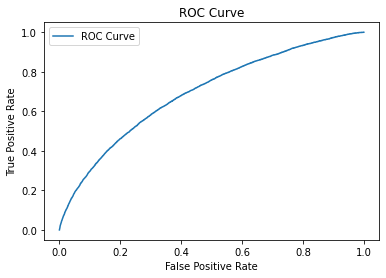

AUC Score: 0.6935385717984413


In [206]:
y_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_prob))


In [207]:
# Feature Importance

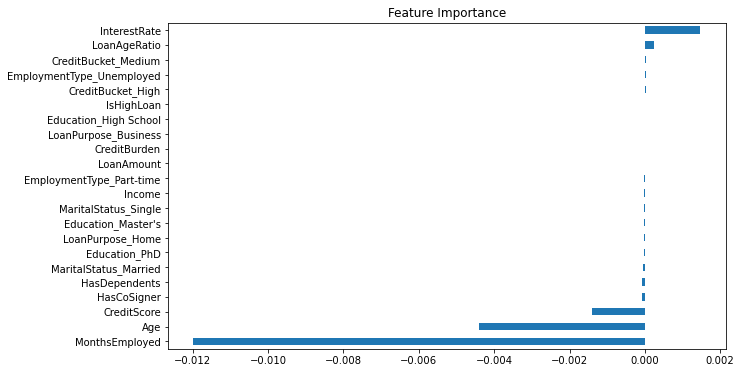

In [208]:
# Feature Importance (based on model coefficients)
coef_df = pd.Series(model.coef_[0], index=X.columns)
coef_df.sort_values().plot(kind='barh', figsize=(10,6), title='Feature Importance')
plt.show()
